In [1]:

import random
import numpy as np
import scipy.io.wavfile as sound
from PIL import Image, ImageOps
from scipy import interpolate #to umpsample

def rgb2ycrcb(sens, img):
    res = img
    trs = np.array([[0.2989, -0.1688, 0.5],[0.5866, -0.3312, -0.4184],[ 0.1145, 0.5, -0.0816]]).T
    trinv = np.linalg.inv(trs)
    if (sens == 0):
        R = img[:, :, 0]
        G = img[:, :, 1]
        B = img[:, :, 2]
        Y = trs[0,0]*R+trs[0,1]*G+trs[0,2]*B
        Cb = trs[1,0]*R+trs[1,1]*G+trs[1,2]*B
        Cr = trs[2,0]*R+trs[2,1]*G+trs[2,2]*B
        res[:,:,0] = Y
        res[:,:,1] = Cb
        res[:,:,2] = Cr
        return  res
    elif(sens == 1 ):
        Y = img[:, :, 0]
        Cb = img[:, :, 1]
        Cr = img[:, :, 2]
        Rp = trinv[0,0]*Y+trinv[0,1]*Cb+trinv[0,2]*Cr
        Gp = trinv[1,0]*Y+trinv[1,1]*Cb+trinv[1,2]*Cr
        Bp = trinv[2,0]*Y+trinv[2,1]*Cb+trinv[2,2]*Cr
        res[:,:,0] = Rp
        res[:,:,1] = Gp
        res[:,:,2] = Bp
        return res

def get_signature(n_b, ID):
    np.random.seed(ID)
    signature = np.ndarray(shape=(n_b,n_b), dtype = int, buffer=np.random.choice([-1,1], n_b*n_b))
    return signature

#here we use np.kron that upsample our data
def get_sequence_b(cr, signature):
    sequence_b = np.kron(signature, np.ones((cr,cr)))
    return sequence_b

def get_sequence_p(Clef_P, cr, a):
	np.random.seed(Clef_P)
	p = np.ndarray(shape=(cr*len(a), cr*len(a)), dtype= int, buffer=np.random.standard_normal(cr*len(a)*cr*len(a)))
	return p

def get_watermark_w(alpha, sequence_b, sequence_p):
    w = alpha * np.matmul(sequence_b, sequence_p)
    return w

def get_watermark_image(alpha, w, img):
    wi = img + w * alpha
    return wi

#decoding process
def demodulate(cr, p, img, a):
    wd = np.ndarray((len(a),len(a)), dtype=int)
    for i in range(len(a)):
        for j in range(len(a[i])):
            sum = 0
            for k in range(n*cr, (n+1)*cr):
                sum += p[k]*img[k]
            wd[n] = sum/cr
    return np.sign(wd)

def tatoue2d(sens, img, sig, clef, cr, alpha):
    if(sens == 0):
        sequence_b = get_sequence_b(cr, sig)
        sequence_p = get_sequence_p(clef, cr, sig)
        w = get_watermark_w(alpha, sequence_b, sequence_p)
        res = get_watermark_image(alpha, w, img)
        return res
    elif (sens == 1):
        sequence_p = get_sequence_p(clef, cr, sig)
        res = demodulate(cr, sequence_p, img, sig)
        return res


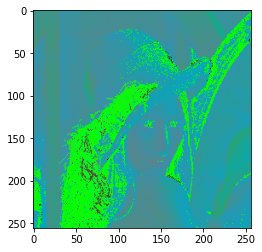

In [5]:
import matplotlib.pyplot as plt
def main():
    img = Image.open("lenna.bmp")
    img = np.asarray(img).copy()
    clef = 25
    sig = get_signature(4, clef)

    plt.imshow(img/255)
    res=rgb2ycrcb(0, img)
    #plt.imshow(res[:,:,0], cmap='gray',vmin = 0, vmax = 255)
    #plt.imshow(res[:,:,1], cmap='gray',vmin = 0, vmax = 255)
    #plt.imshow(res[:,:,2], cmap='gray',vmin = 0, vmax = 255)
    #plt.imshow(res/255)
    #res=rgb2ycrcb(1, img)
    #plt.imshow(res[:,:,0], cmap='gray',vmin = 0, vmax = 255)
    #plt.imshow(res[:,:,1], cmap='gray',vmin = 0, vmax = 255)
    #plt.imshow(res[:,:,2], cmap='gray',vmin = 0, vmax = 255)
    #plt.imshow(res/255)
    l=res[:,:,0]
    lm=tatoue2d(0,l,sig,clef, 64, 1) 
    res[:,:,0]=lm 
    img_marque=rgb2ycrcb(1,res) 

    plt.imshow(res)

    res=rgb2ycrcb(1,img_marque)
    l=res[:,:,0]
    #erreur=tatoue2d(1,l,sig,clef, 64, 1)
    #print(erreur)

main()